In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mushroom-classification/mushrooms.csv


# Importing Libraries

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, plot_confusion_matrix , accuracy_score

In [3]:
df=pd.read_csv('../input/mushroom-classification/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.describe(include='all')

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [5]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

# Label Encoding to Categorical Variables

In [6]:
categorical_cols = [col for col in df.columns if df[col].dtype=='object']
label_encoder=LabelEncoder()
labelled_df=df.copy()
for col in categorical_cols:
    labelled_df[col]=label_encoder.fit_transform(df[col])
labelled_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


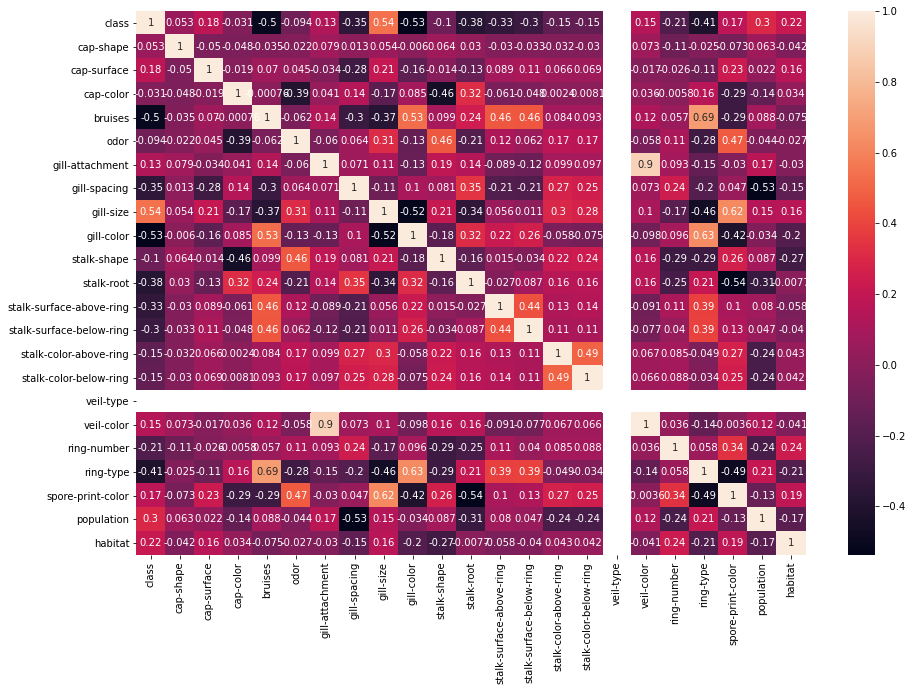

In [7]:
correlation=labelled_df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation,annot=True)

In [8]:
labelled_df.drop('veil-type',axis=1,inplace=True)

# Train Test Split

In [9]:
y=labelled_df.iloc[:,0]
X=labelled_df.iloc[:,1:22]

In [10]:
scaler=StandardScaler()
feature_set=scaler.fit_transform(X)
feature_set

array([[ 1.02971224,  0.14012794, -0.19824983, ..., -0.67019486,
        -0.5143892 ,  2.03002809],
       [ 1.02971224,  0.14012794,  1.76587407, ..., -0.2504706 ,
        -1.31310821, -0.29572966],
       [-2.08704716,  0.14012794,  1.37304929, ..., -0.2504706 ,
        -1.31310821,  0.86714922],
       ...,
       [-0.8403434 ,  0.14012794, -0.19824983, ..., -1.50964337,
        -2.11182722,  0.28570978],
       [-0.21699152,  0.95327039, -0.19824983, ...,  1.42842641,
         0.28432981,  0.28570978],
       [ 1.02971224,  0.14012794, -0.19824983, ...,  0.16925365,
        -2.11182722,  0.28570978]])

In [11]:
X_train,X_val,y_train,y_val=train_test_split(feature_set,y,test_size=0.2,random_state=0)
X_train

array([[-0.21699152,  0.14012794, -0.59107461, ...,  1.42842641,
        -0.5143892 , -0.29572966],
       [ 1.02971224, -1.48615695,  1.37304929, ...,  1.42842641,
        -1.31310821, -0.29572966],
       [ 1.02971224,  0.14012794,  1.37304929, ..., -0.67019486,
        -0.5143892 ,  0.86714922],
       ...,
       [ 1.02971224,  0.14012794, -0.59107461, ..., -0.2504706 ,
        -0.5143892 , -0.29572966],
       [-0.8403434 , -1.48615695, -0.19824983, ..., -0.2504706 ,
         0.28432981, -0.8771691 ],
       [ 1.02971224,  0.95327039, -0.59107461, ..., -0.2504706 ,
         1.08304882, -0.8771691 ]])

# Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(C=0.01,solver='sag')
lr.fit(X_train,y_train)
pred=lr.predict(X_val)
lr_acc=accuracy_score(pred,y_val)
lr_acc

0.9403076923076923

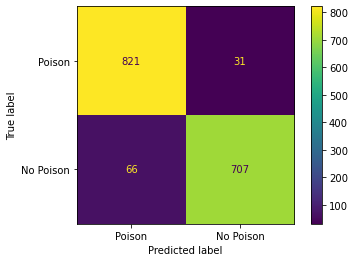

In [13]:
plot_confusion_matrix(lr,X_val,y_val,display_labels=['Poison','No Poison'])

# Gaussian Naive Bayes

In [14]:
from sklearn.naive_bayes import GaussianNB

nb=GaussianNB()
nb.fit(X_train,y_train)
pred=nb.predict(X_val)
nb_acc=accuracy_score(pred,y_val)
nb_acc

0.9156923076923077

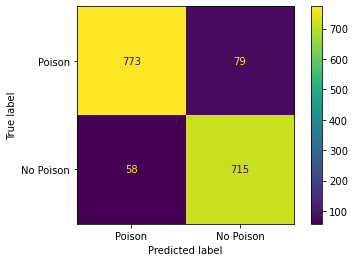

In [15]:
plot_confusion_matrix(nb,X_val,y_val,display_labels=['Poison','No Poison'])

# KNearest Neighbors

In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
pred=knn.predict(X_val)
knn_acc=accuracy_score(pred,y_val)
knn_acc

1.0

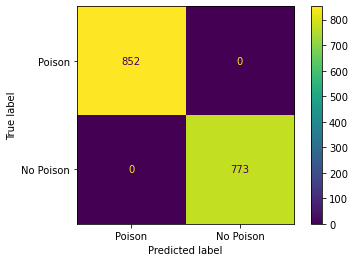

In [17]:
plot_confusion_matrix(knn,X_val,y_val,display_labels=['Poison','No Poison'])

# Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier

tree=DecisionTreeClassifier(criterion='entropy')
tree.fit(X_train,y_train)
pred=tree.predict(X_val)
tree_acc=accuracy_score(pred,y_val)
tree_acc

1.0

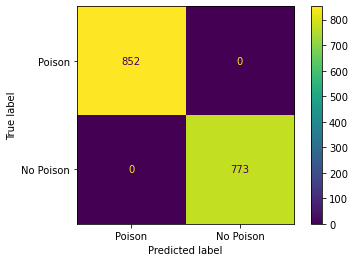

In [19]:
plot_confusion_matrix(tree,X_val,y_val,display_labels=['Poison','No Poison'])

# Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

forest=RandomForestClassifier(n_estimators=100,random_state=0)
forest.fit(X_train,y_train)
pred=forest.predict(X_val)
forest_acc=accuracy_score(pred,y_val)
forest_acc

1.0

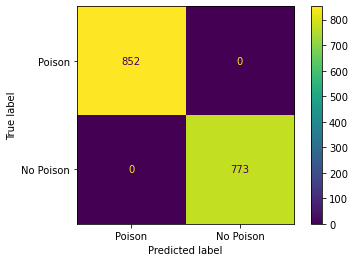

In [21]:
plot_confusion_matrix(forest,X_val,y_val,display_labels=['Poison','No Poison'])

# Xg Boost

In [22]:
from xgboost import XGBClassifier

xgb=XGBClassifier()
xgb.fit(X_train,y_train)
pred=xgb.predict(X_val)
xgb_acc=accuracy_score(pred,y_val)
xgb_acc

1.0

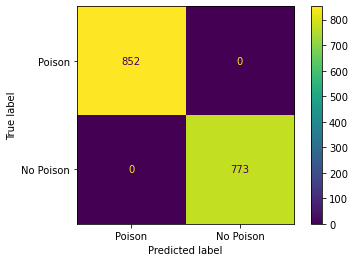

In [23]:
plot_confusion_matrix(xgb,X_val,y_val,display_labels=['Poison','No Poison'])

# Models' Accurccy

In [24]:
df_acc=pd.DataFrame({
    'Models':['Logistic Regression','Gaussian Naive Bayes','KNeighbors','Decision Tree','Random Forest','Xg Boost'],
    'Accuracy':[lr_acc,nb_acc,knn_acc,tree_acc,forest_acc,xgb_acc]
})
df_acc.sort_values(by='Accuracy',ascending=False)

,Models,Accuracy
2,KNeighbors,1.000000
3,Decision Tree,1.000000
4,Random Forest,1.000000
5,Xg Boost,1.000000
0,Logistic Regression,0.940308
1,Gaussian Naive Bayes,0.915692
